# This project is about Identification in Plane Crash Investigation

## Import the required library

In [29]:
# import numerical python for performing operations on different data structure.
import numpy as np 

# import pandas for converting different file format into pandas dataframe.
import pandas as pd

# import seaborn and matplotlib for creating interactive visualization.
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [31]:
# Load the data from local
df_FlightIncident_1000 = pd.read_csv("FlightIncident_1000.csv")

In [33]:
# Check the first five observation from data
df_FlightIncident_1000.head()

,Flight_ID,Date,Time,Aircraft_Type,Aircraft_Age,Flight_Hours,Crew_Experience,Pilot_Error_Flag,Altitude,Airspeed,...,Air_Traffic_Control_Issue,Flight_Phase,Terrain_Type,Crash_Severity,Casualties,Survivors,External_Factor,Flight_Data_Anomaly_Score,Crash_Cause,Crash_Risk_Score
0,FL5447,29-06-2023,02:35:26,Airbus A330,11.4,15331,13886,True,23697,225,...,True,Descent,Urban,Non-Fatal,0,77,Bird Strike,0.05,Weather,0.94
1,FL0032,29-12-2023,12:44:26,Airbus A350,14.9,20960,10798,True,41937,391,...,False,Cruise,Mountain,Fatal,100,52,NaN,0.29,Mechanical Failure,0.38
2,FL1920,11-04-2021,10:26:31,Boeing 737-900,22.4,28749,7742,True,22609,419,...,True,Landing,Mountain,Non-Fatal,0,144,Bird Strike,0.87,Mechanical Failure,0.37
3,FL6713,20-03-2019,02:16:37,Airbus A321,19.6,37454,11437,True,8792,224,...,False,Climb,Runway,Fatal,15,74,NaN,0.77,External,0.74
4,FL8130,29-09-2022,17:29:42,Boeing 737-700,21.8,5410,2918,True,6059,428,...,True,Takeoff,Rural,Non-Fatal,0,266,Bird Strike,0.07,ATC,0.99


In [7]:
# Check the last 5 observation 
df_FlightIncident_1000.tail()

,Flight_ID,Date,Time,Aircraft_Type,Aircraft_Age,Flight_Hours,Crew_Experience,Pilot_Error_Flag,Altitude,Airspeed,...,Air_Traffic_Control_Issue,Flight_Phase,Terrain_Type,Crash_Severity,Casualties,Survivors,External_Factor,Flight_Data_Anomaly_Score,Crash_Cause,Crash_Risk_Score
995,FL6141,27-05-2024,09:48:25,Airbus A350,18.3,17741,9055,False,18433,436,...,False,Cruise,Mountain,Minor,0,305,NaN,0.94,ATC,0.02
996,FL2974,11-08-2024,14:30:15,Airbus A350,8.3,52324,17463,True,40589,301,...,False,Takeoff,Urban,Minor,0,88,Terrorism,0.08,Weather,0.09
997,FL6122,11-11-2019,16:54:02,Boeing 747-800,20.4,68651,3770,True,21423,249,...,False,Descent,Ocean,Non-Fatal,0,94,NaN,0.22,External,0.76
998,FL2911,13-01-2020,20:55:51,Airbus A320,3.4,64973,17572,True,40278,353,...,True,Cruise,Runway,Fatal,293,1,Bird Strike,0.13,External,0.10
999,FL9403,07-06-2023,20:38:55,Boeing 737-700,1.3,47964,6107,True,6125,158,...,True,Climb,Rural,Fatal,207,53,Terrorism,0.07,Human Error,0.31


## Data Overview

In [9]:
# checks the columns we have into the data
df_FlightIncident_1000.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Aircraft_Age',
       'Flight_Hours', 'Crew_Experience', 'Pilot_Error_Flag', 'Altitude',
       'Airspeed', 'Weather_Condition', 'Visibility', 'Wind_Speed',
       'Temperature', 'Icing_Condition', 'Mechanical_Failure_Flag',
       'Engine_Failure_Type', 'Maintenance_History',
       'Air_Traffic_Control_Issue', 'Flight_Phase', 'Terrain_Type',
       'Crash_Severity', 'Casualties', 'Survivors', 'External_Factor',
       'Flight_Data_Anomaly_Score', 'Crash_Cause', 'Crash_Risk_Score'],
      dtype='object')

**Interpretation**
- Flight_ID – unique identifier for the flight.
- Date – calendar date of the flight (YYYY‑MM‑DD).
- Time – local time of the incident (HH:MM).
- Aircraft_Type – model or series of the aircraft (e.g., B737‑800)
- Aircraft_Age – years since the aircraft’s first delivery.
- Flight_Hours – total cumulative hours the airframe has flown.
- Crew_Experience – aggregate flight‑hours or rating level of the crew.
- Pilot_Error_Flag – 1 = pilot action contributed; 0 = no pilot error.
- Altitude – altitude (usually feet) at the critical moment.
- Airspeed – indicated airspeed (knots) at the same moment.
- Weather_Condition – overall weather label (VMC, IMC, storm, etc.).
- Visibility – horizontal visibility (kilometres or metres).
- Wind_Speed – surface or en‑route wind speed (knots).
- Temperature – outside air temperature (°C).
- Icing_Condition – 1 = icing present; 0 = none.
- Mechanical_Failure_Flag – 1 = mechanical issue noted; 0 = none.
- Engine_Failure_Type – code/label if an engine failure occurred.
- Maintenance_History – notes or score summarizing recent maintenance.
- Air_Traffic_Control_Issue – 1 = ATC contributed; 0 = none.
- Flight_Phase – phase when event happened (take‑off, cruise, etc.).
- Terrain_Type – terrain at crash site (mountain, sea, flat land…).
- Crash_Severity – qualitative scale (Minor, Major, Catastrophic).
- Casualties – number of fatalities.
- Survivors – number of people who survived.
- External_Factor – bird strike, sabotage, volcanic ash, etc.
- Flight_Data_Anomaly_Score – numeric score indicating data deviations.
- Crash_Cause – final determined primary cause category.
- Crash_Risk_Score – composite risk rating calculated for the flight.

In [11]:
# Check the shape of data
df_FlightIncident_1000.shape

(1000, 28)

**Interpretation**
 - we have 1000 observation and 28 attributes

In [13]:
df_FlightIncident_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Flight_ID                  1000 non-null   object 
 1   Date                       1000 non-null   object 
 2   Time                       1000 non-null   object 
 3   Aircraft_Type              1000 non-null   object 
 4   Aircraft_Age               1000 non-null   float64
 5   Flight_Hours               1000 non-null   int64  
 6   Crew_Experience            1000 non-null   int64  
 7   Pilot_Error_Flag           1000 non-null   bool   
 8   Altitude                   1000 non-null   int64  
 9   Airspeed                   1000 non-null   int64  
 10  Weather_Condition          1000 non-null   object 
 11  Visibility                 1000 non-null   float64
 12  Wind_Speed                 1000 non-null   int64  
 13  Temperature                1000 non-null   int64 

**Interpretation**
 - We have 16 numerical columns and 4 categorical columns
 - This data acquires 1.5+ mb space. 

In [27]:
# Check for basics statistics 
df_FlightIncident_1000.describe().T

,count,mean,std,min,25%,50%,75%,max
Aircraft_Age,1000.0,12.72350,7.193218,0.5,6.60,12.35,19.10,25.0
Flight_Hours,1000.0,36917.32500,19102.546207,5002.0,20088.00,35875.50,53962.25,69994.0
Crew_Experience,1000.0,10647.31800,5479.680041,1000.0,5945.00,10605.00,15285.75,19966.0
Altitude,1000.0,20989.67900,12145.497234,24.0,10295.50,21069.00,31643.00,41937.0
Airspeed,1000.0,330.40800,130.472336,100.0,221.00,328.00,445.25,548.0
Visibility,1000.0,7.77910,4.271299,0.5,4.00,7.80,11.60,15.0
Wind_Speed,1000.0,17.04200,10.214234,0.0,9.00,17.00,26.00,34.0
Temperature,1000.0,11.19600,18.516707,-19.0,-4.25,10.00,27.00,44.0
Maintenance_History,1000.0,2.47800,1.695993,0.0,1.00,2.00,4.00,5.0
Casualties,1000.0,61.05800,102.536395,0.0,0.00,0.00,109.00,349.0


**Interpretation**
 - After analyzing the dataset, it is observed that the Crash_Risk_Score column contains noticeable outliers, while the remaining columns exhibit values within a normal or expected range.

## Data Preprocessing

In [36]:
# Check the name of the columns 
df_FlightIncident_1000.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Aircraft_Age',
       'Flight_Hours', 'Crew_Experience', 'Pilot_Error_Flag', 'Altitude',
       'Airspeed', 'Weather_Condition', 'Visibility', 'Wind_Speed',
       'Temperature', 'Icing_Condition', 'Mechanical_Failure_Flag',
       'Engine_Failure_Type', 'Maintenance_History',
       'Air_Traffic_Control_Issue', 'Flight_Phase', 'Terrain_Type',
       'Crash_Severity', 'Casualties', 'Survivors', 'External_Factor',
       'Flight_Data_Anomaly_Score', 'Crash_Cause', 'Crash_Risk_Score'],
      dtype='object')

**Interpretation**
 - After looking at the columns i conclude that there is no need to rename the columns.

In [39]:
# Check the format of columns 
df_FlightIncident_1000.head()

,Flight_ID,Date,Time,Aircraft_Type,Aircraft_Age,Flight_Hours,Crew_Experience,Pilot_Error_Flag,Altitude,Airspeed,...,Air_Traffic_Control_Issue,Flight_Phase,Terrain_Type,Crash_Severity,Casualties,Survivors,External_Factor,Flight_Data_Anomaly_Score,Crash_Cause,Crash_Risk_Score
0,FL5447,29-06-2023,02:35:26,Airbus A330,11.4,15331,13886,True,23697,225,...,True,Descent,Urban,Non-Fatal,0,77,Bird Strike,0.05,Weather,0.94
1,FL0032,29-12-2023,12:44:26,Airbus A350,14.9,20960,10798,True,41937,391,...,False,Cruise,Mountain,Fatal,100,52,NaN,0.29,Mechanical Failure,0.38
2,FL1920,11-04-2021,10:26:31,Boeing 737-900,22.4,28749,7742,True,22609,419,...,True,Landing,Mountain,Non-Fatal,0,144,Bird Strike,0.87,Mechanical Failure,0.37
3,FL6713,20-03-2019,02:16:37,Airbus A321,19.6,37454,11437,True,8792,224,...,False,Climb,Runway,Fatal,15,74,NaN,0.77,External,0.74
4,FL8130,29-09-2022,17:29:42,Boeing 737-700,21.8,5410,2918,True,6059,428,...,True,Takeoff,Rural,Non-Fatal,0,266,Bird Strike,0.07,ATC,0.99


**Interpretation**
 - There is few impurities are present that we solve in basic Excel.

### Null Value Handling

In [43]:
# Check the count null record
df_FlightIncident_1000.isnull().sum()

Flight_ID                      0
Date                           0
Time                           0
Aircraft_Type                  0
Aircraft_Age                   0
Flight_Hours                   0
Crew_Experience                0
Pilot_Error_Flag               0
Altitude                       0
Airspeed                       0
Weather_Condition              0
Visibility                     0
Wind_Speed                     0
Temperature                    0
Icing_Condition                0
Mechanical_Failure_Flag        0
Engine_Failure_Type          246
Maintenance_History            0
Air_Traffic_Control_Issue      0
Flight_Phase                   0
Terrain_Type                   0
Crash_Severity                 0
Casualties                     0
Survivors                      0
External_Factor              327
Flight_Data_Anomaly_Score      0
Crash_Cause                    0
Crash_Risk_Score               0
dtype: int64

In [45]:
# Find the %ge for null records
# Notes we have to find %ge of null records because the laws we have handlin the null values depends on %ge.
df_FlightIncident_1000.isnull().sum()/len(df_FlightIncident_1000)*100

Flight_ID                     0.0
Date                          0.0
Time                          0.0
Aircraft_Type                 0.0
Aircraft_Age                  0.0
Flight_Hours                  0.0
Crew_Experience               0.0
Pilot_Error_Flag              0.0
Altitude                      0.0
Airspeed                      0.0
Weather_Condition             0.0
Visibility                    0.0
Wind_Speed                    0.0
Temperature                   0.0
Icing_Condition               0.0
Mechanical_Failure_Flag       0.0
Engine_Failure_Type          24.6
Maintenance_History           0.0
Air_Traffic_Control_Issue     0.0
Flight_Phase                  0.0
Terrain_Type                  0.0
Crash_Severity                0.0
Casualties                    0.0
Survivors                     0.0
External_Factor              32.7
Flight_Data_Anomaly_Score     0.0
Crash_Cause                   0.0
Crash_Risk_Score              0.0
dtype: float64

**Interpretation**
- After observation, we conclude that there are 2 null records present.

### Outliers Treatment

### EDA:- Exploratorary Data Analysis

### Univarient Analysis

In [53]:
# To perform univarient analysis let's seggregrate Numerical and Categorical data.
df_num = df_FlightIncident_1000.select_dtypes(include = 'number')


# Check the numerical data 
df_num.head()

,Aircraft_Age,Flight_Hours,Crew_Experience,Altitude,Airspeed,Visibility,Wind_Speed,Temperature,Maintenance_History,Casualties,Survivors,Flight_Data_Anomaly_Score,Crash_Risk_Score
0,11.4,15331,13886,23697,225,10.5,23,24,0,0,77,0.05,0.94
1,14.9,20960,10798,41937,391,4.6,11,-9,4,100,52,0.29,0.38
2,22.4,28749,7742,22609,419,10.4,6,1,0,0,144,0.87,0.37
3,19.6,37454,11437,8792,224,14.2,10,15,5,15,74,0.77,0.74
4,21.8,5410,2918,6059,428,10.6,29,23,1,0,266,0.07,0.99


In [55]:
# seperate the categorical variable from main dataframe
df_cat = df_FlightIncident_1000.select_dtypes(include = 'object')

# Check the categorical data 
df_cat.head()

,Flight_ID,Date,Time,Aircraft_Type,Weather_Condition,Engine_Failure_Type,Flight_Phase,Terrain_Type,Crash_Severity,External_Factor,Crash_Cause
0,FL5447,29-06-2023,02:35:26,Airbus A330,Snow,Bird Strike,Descent,Urban,Non-Fatal,Bird Strike,Weather
1,FL0032,29-12-2023,12:44:26,Airbus A350,Clear,Fuel System,Cruise,Mountain,Fatal,NaN,Mechanical Failure
2,FL1920,11-04-2021,10:26:31,Boeing 737-900,Rain,Fuel System,Landing,Mountain,Non-Fatal,Bird Strike,Mechanical Failure
3,FL6713,20-03-2019,02:16:37,Airbus A321,Clear,Bird Strike,Climb,Runway,Fatal,NaN,External
4,FL8130,29-09-2022,17:29:42,Boeing 737-700,Rain,Compressor Stall,Takeoff,Rural,Non-Fatal,Bird Strike,ATC


#### Univariate Analysis on Numerical Data

In [59]:
# Check the columns 
df_num.columns

Index(['Aircraft_Age', 'Flight_Hours', 'Crew_Experience', 'Altitude',
       'Airspeed', 'Visibility', 'Wind_Speed', 'Temperature',
       'Maintenance_History', 'Casualties', 'Survivors',
       'Flight_Data_Anomaly_Score', 'Crash_Risk_Score'],
      dtype='object')

##### Aircraft_Age

In [66]:
# Find the minimum
df_num.Aircraft_Age.min()

0.5

In [64]:
# Find the maximum
df_num.Aircraft_Age.max()

25.0

In [70]:
# Find the avg
df_num.Aircraft_Age.mean()

12.7235

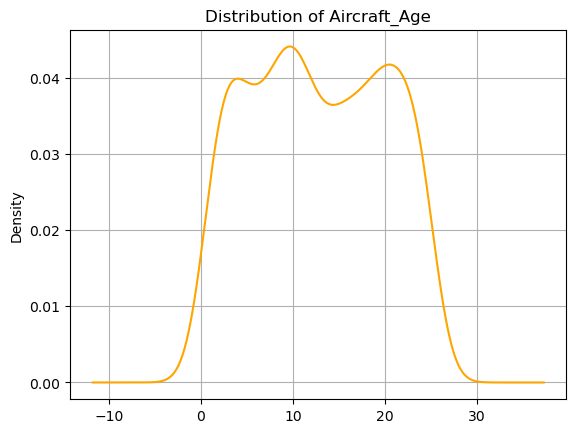

In [72]:
# Check the visualization
df_num.Aircraft_Age.plot(kind = 'kde', color = 'orange')
plt.title('Distribution of Aircraft_Age')
plt.grid()

**Interpretation**
- The minimum Aircraft_Age is -0.5
- The maximum Aircraft_Age is 25.0
- The average (mean) Aircraft_Age is 12.72

In [77]:
# Check the columns
df_num.columns

Index(['Aircraft_Age', 'Flight_Hours', 'Crew_Experience', 'Altitude',
       'Airspeed', 'Visibility', 'Wind_Speed', 'Temperature',
       'Maintenance_History', 'Casualties', 'Survivors',
       'Flight_Data_Anomaly_Score', 'Crash_Risk_Score'],
      dtype='object')

#### Flight_Hours

In [82]:
# Find the minimum
df_num.Flight_Hours.min()

5002

In [84]:
# find the maximum
df_num.Flight_Hours.max()

69994

In [86]:
# find the average
df_num.Flight_Hours.mean()

36917.325

**Interpretation**

- The minimum Flight_Hours is 5,002

- The maximum Flight_Hours is 69,994

- The average (mean) Flight_Hours is 36,917.33

In [89]:
# Find the minimum
df_num.Crew_Experience.min()

1000

In [91]:
# Find the maximum
df_num.Crew_Experience.max()

19966

In [93]:
# find the average
df_num.Crew_Experience.mean()

10647.318

**Interpretation**
- The minimum Crew_Experience is 1000
- The maximum Crew_Experience is 19966
- The average (mean) Crew_Experience is 10647.318

In [99]:
# find the minimum
df_num.Altitude.min()

24

In [101]:
# Find the maximum
df_num.Altitude.max()

41937

In [103]:
# find the average
df_num.Altitude.mean()

20989.679

**Interpretation**
- The minimum Altitudee is 24
- The maximum Altitude is 41937
- The average (mean) Altitude is 20989.679

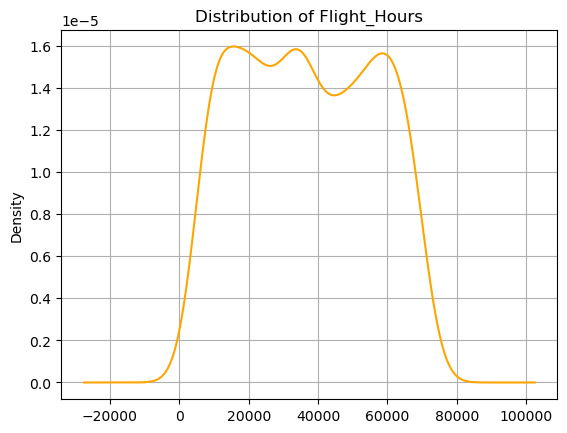

In [108]:
# Check the visualization
df_num.Flight_Hours.plot(kind = 'kde', color = 'orange')
plt.title('Distribution of Flight_Hours')
plt.grid()

In [110]:
# Check the columns
df_num.columns

Index(['Aircraft_Age', 'Flight_Hours', 'Crew_Experience', 'Altitude',
       'Airspeed', 'Visibility', 'Wind_Speed', 'Temperature',
       'Maintenance_History', 'Casualties', 'Survivors',
       'Flight_Data_Anomaly_Score', 'Crash_Risk_Score'],
      dtype='object')

#### Crew_Experience

In [113]:
# find the minimum
df_num.Crew_Experience.min()

1000

In [115]:
# Find the maximum
df_num.Crew_Experience.max()

19966

In [119]:
# Find the average
df_num.Crew_Experience.mean()

10647.318

**Interpretation**
- The minimum Altitudee is 100
- The maximum Altitude is 19966
- The average (mean) Altitude is 10647.318

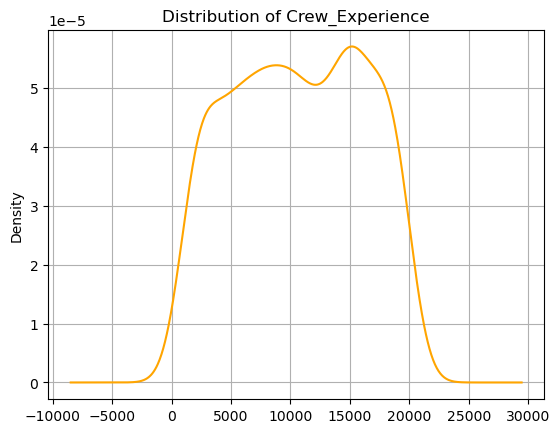

In [122]:
# Check the visualization
df_num.Crew_Experience.plot(kind = 'kde', color = 'orange')
plt.title('Distribution of Crew_Experience')
plt.grid()

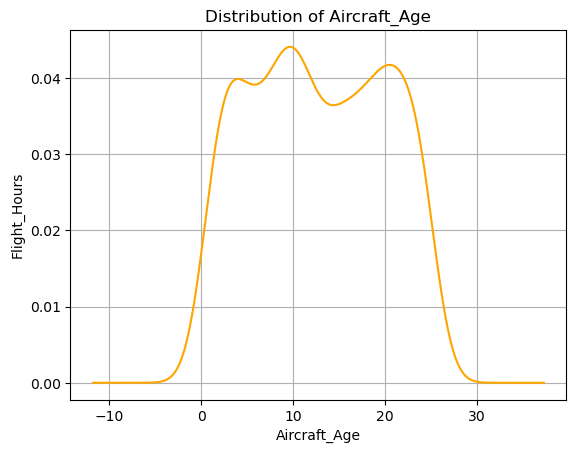

In [124]:
import matplotlib.pyplot as plt

# KDE plot for Market_Cap
df_num['Aircraft_Age'].plot(kind='kde', color='orange')

# Add title and grid
plt.title('Distribution of Aircraft_Age')
plt.xlabel('Aircraft_Age')
plt.ylabel('Flight_Hours')
plt.grid(True)

# Show the plot
plt.show()

**Interpretation**
- The minimum Altitudee is 100
- The maximum Altitude is 19966
- The average (mean) Altitude is 10647.318

#### univrtant anysis on categrical varibale

In [130]:
# check the column name 
df_cat.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Weather_Condition',
       'Engine_Failure_Type', 'Flight_Phase', 'Terrain_Type', 'Crash_Severity',
       'External_Factor', 'Crash_Cause'],
      dtype='object')

In [132]:
##### Flight_ID
df_cat.Flight_ID.count()

1000

In [134]:
#check the count each categricry present in columns
df_cat.Flight_ID.value_counts()

Flight_ID
FL2690    3
FL2292    2
FL0880    2
FL8252    2
FL4746    2
         ..
FL7257    1
FL3762    1
FL6525    1
FL6765    1
FL9403    1
Name: count, Length: 945, dtype: int64

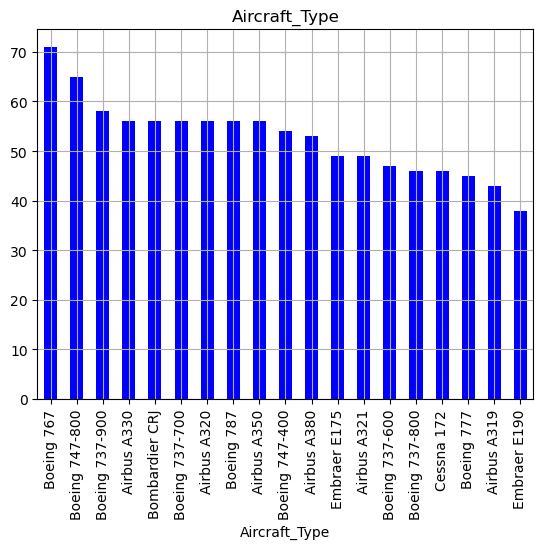

In [138]:
# Create a visualisation 
df_cat.Aircraft_Type.value_counts().plot(kind = 'bar',color = 'blue')
plt.title('Aircraft_Type')
plt.grid()

**Interpretation**
- the data balance 

### Bia virent anysis 

In [142]:
# for finding the best pairs we have to canculude crelatel matrix
df_num.corr()

,Aircraft_Age,Flight_Hours,Crew_Experience,Altitude,Airspeed,Visibility,Wind_Speed,Temperature,Maintenance_History,Casualties,Survivors,Flight_Data_Anomaly_Score,Crash_Risk_Score
Aircraft_Age,1.000000,0.015525,-0.005293,-0.013798,0.057178,-0.013332,0.030139,-0.080143,0.019509,0.032626,-0.015006,-0.047802,-0.064442
Flight_Hours,0.015525,1.000000,-0.027922,0.004165,0.041916,-0.007978,-0.052387,-0.005940,0.000652,-0.021642,0.043201,0.019034,-0.013573
Crew_Experience,-0.005293,-0.027922,1.000000,0.009024,-0.024348,-0.007659,0.033817,-0.028876,-0.027324,0.026483,-0.054123,-0.023156,-0.009943
Altitude,-0.013798,0.004165,0.009024,1.000000,-0.003369,-0.011831,0.075734,0.034106,-0.028150,-0.030480,0.003936,-0.003506,-0.005586
Airspeed,0.057178,0.041916,-0.024348,-0.003369,1.000000,-0.034857,-0.000554,-0.009780,-0.016353,-0.054382,0.038861,-0.032432,-0.013431
Visibility,-0.013332,-0.007978,-0.007659,-0.011831,-0.034857,1.000000,-0.009192,0.023478,-0.016873,0.027094,0.009025,-0.019371,0.013629
Wind_Speed,0.030139,-0.052387,0.033817,0.075734,-0.000554,-0.009192,1.000000,0.011976,-0.002836,0.024529,-0.074926,-0.025025,-0.021874
Temperature,-0.080143,-0.005940,-0.028876,0.034106,-0.009780,0.023478,0.011976,1.000000,-0.054560,-0.000214,0.012055,0.027122,0.007153
Maintenance_History,0.019509,0.000652,-0.027324,-0.028150,-0.016353,-0.016873,-0.002836,-0.054560,1.000000,-0.004672,0.040508,0.022388,0.019757
Casualties,0.032626,-0.021642,0.026483,-0.030480,-0.054382,0.027094,0.024529,-0.000214,-0.004672,1.000000,-0.457401,0.018693,0.008380


<Axes: >

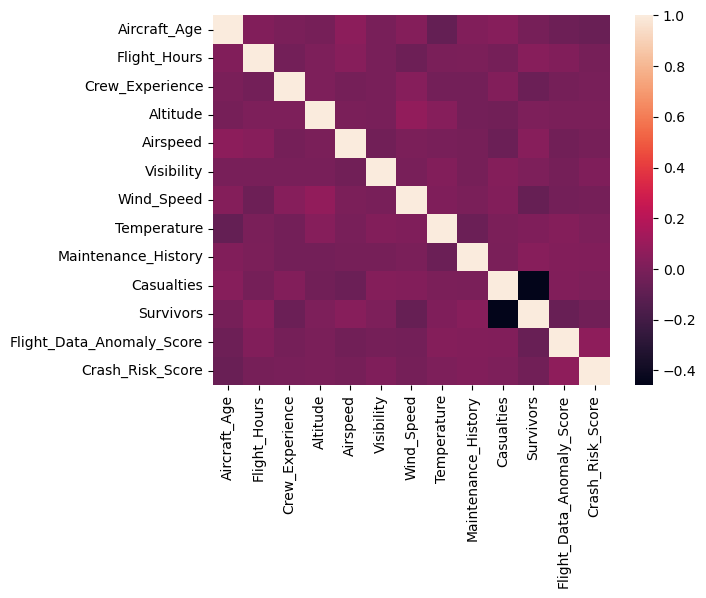

In [144]:
# Visulze the corelation matrix9
# Assuming df_num is your DataFrame containing numerical data
sns.heatmap(df_num.corr())

**Interpretation**
- After loking at the data correlation matrix i conculude there no corelation
- This is representing good for machine Learning beacuse it avoide the problem of multi corelation

- NOTE
- Multicolinerti menas when indeipant variable are corelated each other and we dont wont multicorelati while machine Learnig on data

#### Byvirent  one categeycal and one Nurmercal Data

In [148]:
# check the categery 
df_cat.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Weather_Condition',
       'Engine_Failure_Type', 'Flight_Phase', 'Terrain_Type', 'Crash_Severity',
       'External_Factor', 'Crash_Cause'],
      dtype='object')

In [150]:
df_num.columns

Index(['Aircraft_Age', 'Flight_Hours', 'Crew_Experience', 'Altitude',
       'Airspeed', 'Visibility', 'Wind_Speed', 'Temperature',
       'Maintenance_History', 'Casualties', 'Survivors',
       'Flight_Data_Anomaly_Score', 'Crash_Risk_Score'],
      dtype='object')

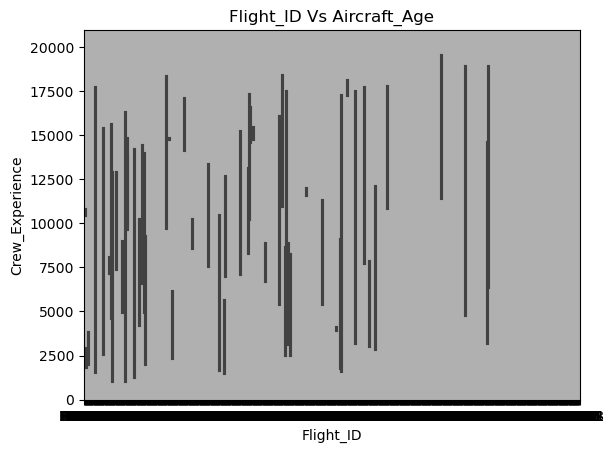

In [298]:
# create and visulization
sns.barplot(x = df_FlightIncident_1000.Flight_ID,
            y = df_FlightIncident_1000.Crew_Experience,
            data = df_FlightIncident_1000)
plt.title("Flight_ID Vs Aircraft_Age")
plt.grid()
plt.show()

**Interpretation**
- The Data is Blalsed here that mean all inside role are contibuting equal is insider Flight_ID


#### Aircraft_Type,Flight_Hours

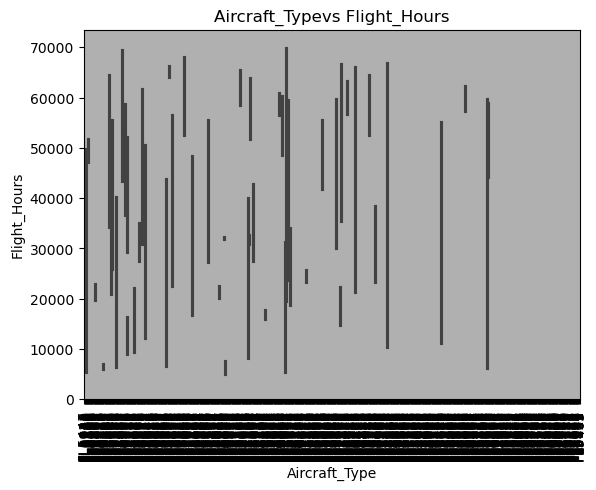

In [176]:
# Correct the DataFrame reference to be consistent
sns.barplot(
    x = df_FlightIncident_1000.Flight_ID,
    y = df_FlightIncident_1000.Flight_Hours
)
plt.title("Aircraft_Type vs Flight_Hours")
plt.xlabel("Aircraft_Type")
plt.ylabel("Flight_Hours")
plt.grid(True)
plt.xticks(rotation=90)  # Optional: rotates x-axis labels if too crowded
plt.show()


**Interpretation**
- The Data is Blalsed here that mean all inside role are contibuting equal is insider Flight_Hours

#### Aircraft_Type,Crew_Experience

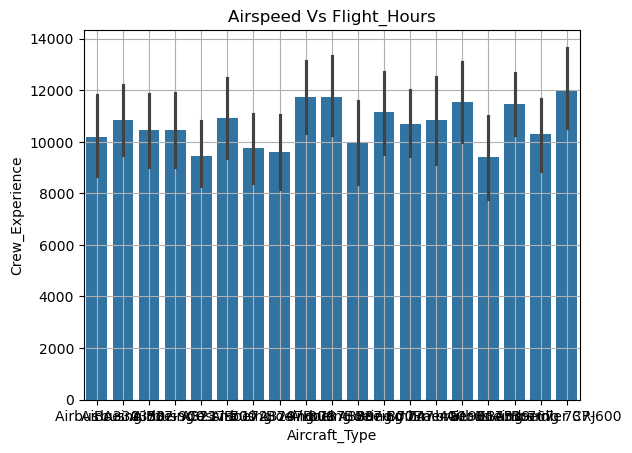

In [183]:
sns.barplot(x = df_FlightIncident_1000.Aircraft_Type,
            y = df_FlightIncident_1000.Crew_Experience,
            data = df_FlightIncident_1000,)
plt.title("Airspeed Vs Flight_Hours")
plt.grid()
plt.show()

**Interpretation**
- The Data is Blalsed here that mean all inside role are contibuting equal is in Aircraft_Type

### Multivarent analysis

In [190]:
# here also we have to find the pare two categical one numbercal varble 
# check for cat. ver
df_cat.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Weather_Condition',
       'Engine_Failure_Type', 'Flight_Phase', 'Terrain_Type', 'Crash_Severity',
       'External_Factor', 'Crash_Cause'],
      dtype='object')

In [192]:
# check for num. var.
df_num.columns

Index(['Aircraft_Age', 'Flight_Hours', 'Crew_Experience', 'Altitude',
       'Airspeed', 'Visibility', 'Wind_Speed', 'Temperature',
       'Maintenance_History', 'Casualties', 'Survivors',
       'Flight_Data_Anomaly_Score', 'Crash_Risk_Score'],
      dtype='object')

In [ ]:
'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties


'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

'Flight_ID','Aircraft_Type','Crew_Experience
'Aircraft_Type','Altitude','Flight_Phase
'Weather_Condition','Airspeed','Casualties

#### Flight_ID','Aircraft_Type','Crew_Experience

In [211]:
pd.pivot_table(data=df_FlightIncident_1000,index='Flight_ID',columns='Crew_Experience',values='Crash_Risk_Score',aggfunc='min')


Crew_Experience,1000,1023,1028,1070,1082,1092,1106,1130,1146,1163,...,19831,19834,19854,19868,19872,19905,19920,19932,19956,19966
Flight_ID,,,,,,,,,,,,,,,,,,,,,
FL0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL0032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL0040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FL9938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FL9959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Weather_Condition Temperature Maintenance_History

In [214]:
pd.crosstab(index=df_FlightIncident_1000.Aircraft_Age,
    columns=df_FlightIncident_1000.Aircraft_Type,
    values=df_FlightIncident_1000.Airspeed,aggfunc='max')

Aircraft_Type,Airbus A319,Airbus A320,Airbus A321,Airbus A330,Airbus A350,Airbus A380,Boeing 737-600,Boeing 737-700,Boeing 737-800,Boeing 737-900,Boeing 747-400,Boeing 747-800,Boeing 767,Boeing 777,Boeing 787,Bombardier CRJ,Cessna 172,Embraer E175,Embraer E190
Aircraft_Age,,,,,,,,,,,,,,,,,,,
0.5,NaN,NaN,NaN,246.0,NaN,415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.0,116.0,NaN,NaN,485.0,NaN,NaN,NaN,NaN,518.0,NaN,NaN
0.7,202.0,230.0,NaN,NaN,490.0,NaN,NaN,NaN,NaN,NaN,NaN,318.0,397.0,NaN,NaN,359.0,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435.0,337.0,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.0,500.0,516.0,420.0,NaN,NaN,NaN
24.7,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481.0,NaN,NaN,NaN,NaN,364.0,NaN
24.8,NaN,442.0,NaN,281.0,NaN,NaN,476.0,NaN,237.0,NaN,335.0,307.0,NaN,243.0,NaN,NaN,NaN,NaN,NaN


## Make data ready for maching learning 

In [219]:
# saparted the depent and indipent varable 
df_FlightIncident_1000.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Aircraft_Age',
       'Flight_Hours', 'Crew_Experience', 'Pilot_Error_Flag', 'Altitude',
       'Airspeed', 'Weather_Condition', 'Visibility', 'Wind_Speed',
       'Temperature', 'Icing_Condition', 'Mechanical_Failure_Flag',
       'Engine_Failure_Type', 'Maintenance_History',
       'Air_Traffic_Control_Issue', 'Flight_Phase', 'Terrain_Type',
       'Crash_Severity', 'Casualties', 'Survivors', 'External_Factor',
       'Flight_Data_Anomaly_Score', 'Crash_Cause', 'Crash_Risk_Score'],
      dtype='object')

In [221]:
# Here, we are going to analyze the Aircraft_Type column in the dataset.
target=df_FlightIncident_1000.Aircraft_Age

In [223]:
# check the columns 
df_FlightIncident_1000.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Aircraft_Age',
       'Flight_Hours', 'Crew_Experience', 'Pilot_Error_Flag', 'Altitude',
       'Airspeed', 'Weather_Condition', 'Visibility', 'Wind_Speed',
       'Temperature', 'Icing_Condition', 'Mechanical_Failure_Flag',
       'Engine_Failure_Type', 'Maintenance_History',
       'Air_Traffic_Control_Issue', 'Flight_Phase', 'Terrain_Type',
       'Crash_Severity', 'Casualties', 'Survivors', 'External_Factor',
       'Flight_Data_Anomaly_Score', 'Crash_Cause', 'Crash_Risk_Score'],
      dtype='object')

In [231]:
# drop depent variable for main data frame
ind = df_FlightIncident_1000.drop('Aircraft_Age', axis=1)


In [233]:
# check whare that colums is delete or not 
ind.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Flight_Hours',
       'Crew_Experience', 'Pilot_Error_Flag', 'Altitude', 'Airspeed',
       'Weather_Condition', 'Visibility', 'Wind_Speed', 'Temperature',
       'Icing_Condition', 'Mechanical_Failure_Flag', 'Engine_Failure_Type',
       'Maintenance_History', 'Air_Traffic_Control_Issue', 'Flight_Phase',
       'Terrain_Type', 'Crash_Severity', 'Casualties', 'Survivors',
       'External_Factor', 'Flight_Data_Anomaly_Score', 'Crash_Cause',
       'Crash_Risk_Score'],
      dtype='object')

In [235]:
# 'Aircraft_Age' is a numerical column representing the age of the aircraft.
# We are retaining it as a feature for the machine learning process.
ind=df_FlightIncident_1000.drop('Aircraft_Age',axis = 1)

In [237]:
ind.columns

Index(['Flight_ID', 'Date', 'Time', 'Aircraft_Type', 'Flight_Hours',
       'Crew_Experience', 'Pilot_Error_Flag', 'Altitude', 'Airspeed',
       'Weather_Condition', 'Visibility', 'Wind_Speed', 'Temperature',
       'Icing_Condition', 'Mechanical_Failure_Flag', 'Engine_Failure_Type',
       'Maintenance_History', 'Air_Traffic_Control_Issue', 'Flight_Phase',
       'Terrain_Type', 'Crash_Severity', 'Casualties', 'Survivors',
       'External_Factor', 'Flight_Data_Anomaly_Score', 'Crash_Cause',
       'Crash_Risk_Score'],
      dtype='object')

### Perform encoding on categrical columns

In [240]:
# Seperated categrical columns indepent variable
df_cat_ind=ind.select_dtypes(include ='object')
df_cat_ind.head()

,Flight_ID,Date,Time,Aircraft_Type,Weather_Condition,Engine_Failure_Type,Flight_Phase,Terrain_Type,Crash_Severity,External_Factor,Crash_Cause
0,FL5447,29-06-2023,02:35:26,Airbus A330,Snow,Bird Strike,Descent,Urban,Non-Fatal,Bird Strike,Weather
1,FL0032,29-12-2023,12:44:26,Airbus A350,Clear,Fuel System,Cruise,Mountain,Fatal,NaN,Mechanical Failure
2,FL1920,11-04-2021,10:26:31,Boeing 737-900,Rain,Fuel System,Landing,Mountain,Non-Fatal,Bird Strike,Mechanical Failure
3,FL6713,20-03-2019,02:16:37,Airbus A321,Clear,Bird Strike,Climb,Runway,Fatal,NaN,External
4,FL8130,29-09-2022,17:29:42,Boeing 737-700,Rain,Compressor Stall,Takeoff,Rural,Non-Fatal,Bird Strike,ATC


In [242]:
# perform encoding 
encoded = pd.get_dummies(df_cat_ind)
encoded.columns

Index(['Flight_ID_FL0001', 'Flight_ID_FL0028', 'Flight_ID_FL0031',
       'Flight_ID_FL0032', 'Flight_ID_FL0040', 'Flight_ID_FL0047',
       'Flight_ID_FL0058', 'Flight_ID_FL0068', 'Flight_ID_FL0086',
       'Flight_ID_FL0092',
       ...
       'Crash_Severity_Fatal', 'Crash_Severity_Minor',
       'Crash_Severity_Non-Fatal', 'External_Factor_Bird Strike',
       'External_Factor_Terrorism', 'Crash_Cause_ATC', 'Crash_Cause_External',
       'Crash_Cause_Human Error', 'Crash_Cause_Mechanical Failure',
       'Crash_Cause_Weather'],
      dtype='object', length=2825)

In [244]:
# check data encodeding 
encoded.head()

,Flight_ID_FL0001,Flight_ID_FL0028,Flight_ID_FL0031,Flight_ID_FL0032,Flight_ID_FL0040,Flight_ID_FL0047,Flight_ID_FL0058,Flight_ID_FL0068,Flight_ID_FL0086,Flight_ID_FL0092,...,Crash_Severity_Fatal,Crash_Severity_Minor,Crash_Severity_Non-Fatal,External_Factor_Bird Strike,External_Factor_Terrorism,Crash_Cause_ATC,Crash_Cause_External,Crash_Cause_Human Error,Crash_Cause_Mechanical Failure,Crash_Cause_Weather
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False


### Perform Scaling on Numerical Data

In [247]:
# Make new datframe for indepentdt for indepent 
df_num_ind=ind.select_dtypes(include = 'number')

In [249]:
# import standrd scalre for scaling 
from sklearn.preprocessing import StandardScaler

In [251]:
# intiate standrd scaler
ss = StandardScaler()

In [253]:
# Transform the data numarical data
scalled=ss.fit_transform(df_num_ind)

In [255]:
# check the normalize data
scalled

array([[-1.13058888,  0.59133061,  0.22301892, ..., -0.59828975,
        -1.56128287,  1.5042681 ],
       [-0.83576867,  0.02751208,  1.72556151, ..., -0.8453495 ,
        -0.74183727, -0.42520838],
       [-0.42781795, -0.53046377,  0.13339357, ...,  0.06383036,
         1.23848959, -0.45966332],
       ...,
       [ 1.66205873, -1.25568632,  0.03569535, ..., -0.43028913,
        -0.98084224,  0.88407923],
       [ 1.46942261,  1.26433421,  1.58889933, ..., -1.34935137,
        -1.28813434, -1.38994662],
       [ 0.57857222, -0.82898816, -1.22449634, ..., -0.83546711,
        -1.49299574, -0.66639294]])

In [257]:
# create a dataframe for Scalled nurmarical data
df_scalled=pd.DataFrame(scalled,columns = df_num_ind.columns)

In [259]:
# check the scalled datdframe
df_scalled.head()

,Flight_Hours,Crew_Experience,Altitude,Airspeed,Visibility,Wind_Speed,Temperature,Maintenance_History,Casualties,Survivors,Flight_Data_Anomaly_Score,Crash_Risk_Score
0,-1.130589,0.591331,0.223019,-0.808300,0.637338,0.583596,0.691830,-1.461822,-0.595774,-0.598290,-1.561283,1.504268
1,-0.835769,0.027512,1.725562,0.464637,-0.744666,-0.591823,-1.091236,0.897858,0.379977,-0.845349,-0.741837,-0.425208
2,-0.427818,-0.530464,0.133394,0.679350,0.613914,-1.081581,-0.550913,-1.461822,-0.595774,0.063830,1.238490,-0.459663
3,0.028108,0.144183,-1.004799,-0.815968,1.504018,-0.689775,0.205539,1.487778,-0.449412,-0.627937,0.897054,0.815169
4,-1.650204,-1.411248,-1.229933,0.748364,0.660762,1.171305,0.637797,-0.871902,-0.595774,1.269482,-1.492996,1.676543


In [261]:
# Concate the encoded and scalled dataframe
df_main = pd.concat([encoded, df_scalled], axis=1)

In [267]:
# check whaether concated 
df_main.isnull().sum()

Flight_ID_FL0001             0
Flight_ID_FL0028             0
Flight_ID_FL0031             0
Flight_ID_FL0032             0
Flight_ID_FL0040             0
                            ..
Maintenance_History          0
Casualties                   0
Survivors                    0
Flight_Data_Anomaly_Score    0
Crash_Risk_Score             0
Length: 2837, dtype: int64

#### Split the data for traning and Testing

In [269]:
# import the libray for traning and Testing 
from sklearn.model_selection import train_test_split

In [271]:
# saprat the data
X_train,X_test,y_train,y_test=train_test_split(df_main,target,test_size =0.3)

In [273]:
# check the data we have traning 
X_train.head()

,Flight_ID_FL0001,Flight_ID_FL0028,Flight_ID_FL0031,Flight_ID_FL0032,Flight_ID_FL0040,Flight_ID_FL0047,Flight_ID_FL0058,Flight_ID_FL0068,Flight_ID_FL0086,Flight_ID_FL0092,...,Altitude,Airspeed,Visibility,Wind_Speed,Temperature,Maintenance_History,Casualties,Survivors,Flight_Data_Anomaly_Score,Crash_Risk_Score
386,False,False,False,False,False,False,False,False,False,False,...,1.031871,0.058218,-1.517651,1.563111,1.070056,0.307938,-0.595774,-0.874997,-0.127253,-0.494118
180,False,False,False,False,False,False,False,False,False,False,...,1.257088,-0.754622,0.426524,1.563111,0.367636,-0.281982,-0.595774,1.427600,1.238490,-1.700041
941,False,False,False,False,False,False,False,False,False,False,...,-0.067687,0.855720,-0.416733,-0.102066,1.016023,0.307938,-0.595774,-0.420407,1.375064,-0.769758
694,False,False,False,False,False,False,False,False,False,False,...,-0.687403,-1.161041,0.379676,-0.983630,-0.875107,1.487778,-0.595774,1.892072,0.043465,-0.011749
864,False,False,False,False,False,False,False,False,False,False,...,-1.347649,-1.483110,1.269781,-1.081581,1.448282,-0.281982,-0.595774,-0.499466,1.579925,1.676543


In [275]:
y_train.head()

386     9.9
180    11.5
941    11.8
694    19.0
864     2.2
Name: Aircraft_Age, dtype: float64

In [281]:
# check the Testing set
X_test.head().T

,514,857,248,216,25
Flight_ID_FL0001,False,False,False,False,False
Flight_ID_FL0028,False,False,False,False,False
Flight_ID_FL0031,False,False,False,False,False
Flight_ID_FL0032,False,False,False,False,False
Flight_ID_FL0040,False,False,False,False,False
...,...,...,...,...,...
Maintenance_History,0.307938,-1.461822,-0.281982,-1.461822,-1.461822
Casualties,-0.595774,-0.595774,-0.595774,-0.595774,-0.595774
Survivors,1.150893,0.044066,1.348541,1.121246,-0.637819
Flight_Data_Anomaly_Score,-1.527139,-0.571119,-0.161397,1.648212,1.477495


In [283]:
y_test.head()

514     8.6
857    20.4
248    14.4
216     6.2
25     11.5
Name: Aircraft_Age, dtype: float64

### select the Base Model

#### Linear Regression

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 59.72459562082178


#### Ridge  Regression

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the testing data
predictions = ridge_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 58.64515499804195


#### Lasso Model

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the testing data
predictions = lasso_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 52.80201865986394


#### Decision Tree Regressor

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Decision Tree regression model
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data
predictions = tree_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 106.63893333333334


#### Random Forest Regressor

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Random Forest regression model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predict on the testing data
predictions = forest_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 56.85458422666667
